#Telematics

Telematics data downloaded from [kaggle](https://www.kaggle.com/yunlevin/levin-vehicle-telematics) download link.


##Data download and extraction

In [ ]:
# Kaggle download
!pip -q install kaggle
# UMAP and plotting deps
!pip -q install umap-learn[plot]
!pip -q install umap-learn
!pip -q install matplotlib
!pip -q install datashader
!pip -q install bokeh
!pip -q install holoviews

In [ ]:
# Upload kaggle key
from google.colab import files
files.upload()

In [ ]:
# Modify key permission and download data
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d yunlevin/levin-vehicle-telematics
!unzip levin-vehicle-telematics.zip

##EDA

In [ ]:
import pandas as pd
df = pd.read_csv('v2.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
0,1,0.0,2017-12-22 18:43:05,10c0f8e00448fa18c80515d30000000000000000000000...,24.2612,0.0,66.0,0.0,28.6275,40.0,97.0,0.0,0.0,1010.75,23.0,0.0,0.0
1,1,0.0,2017-12-22 18:43:06,1138f8c804780a1ebdf718bcf919d10617c8e301b31017...,23.15,0.0,66.0,0.0,33.7255,40.0,98.0,0.0,0.0,815.5,21.0,0.0,0.0
2,1,0.0,2017-12-22 18:43:07,10f0f89804480612c30010c30714ce0520b7f41dbdf118...,18.7052,0.0,66.0,0.0,43.1373,40.0,98.0,0.0,0.0,862.25,17.0,0.0,0.0
3,1,0.0,2017-12-22 18:43:08,10d0f84804480d15bd0210c9f822c80017caf81ccd0517...,16.4828,0.0,66.0,0.0,41.5686,40.0,97.0,0.0,0.0,817.0,17.0,0.0,0.0
4,1,0.0,2017-12-22 18:43:09,1090f8c80480041dc9081cc50815c60511c60112c40514...,17.4088,0.0,66.0,0.0,43.1373,40.0,97.0,0.0,0.0,804.25,15.0,0.0,0.0


In [ ]:
df.describe()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
count,3120272,3120272.0,3120272,3120272,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0,3120272.0
unique,694,24.0,1740023,1811225,13604.0,997.0,269.0,6.0,515.0,164.0,644.0,168888.0,11608.0,21706.0,416.0,306.0,505.0
top,67,12.0,timeStamp,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,34488,655360.0,32,425984,649936.0,1970863.0,513870.0,2399305.0,680665.0,513825.0,513935.0,1034334.0,794353.0,600135.0,832334.0,1984426.0,1542214.0


Top value for timeStamp is 'timeStamp'. Indicates some data quality issues

In [ ]:
df[df.timeStamp=='timeStamp'].head()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
106461,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
376682,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
630522,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
631504,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
676250,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos


Header rows being dumped in data. Possibly from unioning multiple versions. Check how many before dropping.

In [ ]:
len(df[df.timeStamp=='timeStamp'])

32

In [ ]:
# Create cleansed version excluding corrupt rows
df_cln = df[df.timeStamp!='timeStamp']

In [ ]:
# AccData conversion script provided in repo wasn't working so drop from analysis
df_cln.drop(columns=['accData'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Check column datatypes as likely to be default due to incorrect rows

In [ ]:
df_cln.dtypes

tripID       object
deviceID     object
timeStamp    object
gps_speed    object
battery      object
cTemp        object
dtc          object
eLoad        object
iat          object
imap         object
kpl          object
maf          object
rpm          object
speed        object
tAdv         object
tPos         object
dtype: object

In [ ]:
# Convert dataframe to expected types
# Ignore identifying columns
ignore_columns = ['deviceID', 'tripID']
for i in df_cln.columns:
  if i in ignore_columns:
    continue
  elif i=='timeStamp':
    # Convert timestamp string to datetime
    df_cln.timeStamp = pd.to_datetime(df_cln.timeStamp)
  else:
    # Convert other columns to floats
    df_cln[i] = df_cln[i].astype(float)

In [ ]:
# Check cleansed column types
df_cln.dtypes

tripID               object
deviceID             object
timeStamp    datetime64[ns]
gps_speed           float64
battery             float64
cTemp               float64
dtc                 float64
eLoad               float64
iat                 float64
imap                float64
kpl                 float64
maf                 float64
rpm                 float64
speed               float64
tAdv                float64
tPos                float64
dtype: object

In [ ]:
# Create UID for device and trip combination
df_cln['uid'] = (df_cln.tripID.astype(str) + "-" + df_cln.deviceID.astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Exploratory data analysis of feature columns

In [ ]:
# Drop identifying columns from analysis
df_analysis = df_cln.drop(columns=ignore_columns)

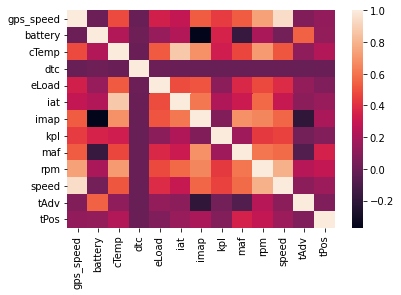

In [ ]:
# Use built in seaborn library to do EDA
import seaborn as sns
corr = df_analysis.corr()

# Correlation heatmap identifies highly correlated variables
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Notable features:
* gps_speed and speed highly correlated so can probably drop one
* dtc, tAdv and tPos not correlated with any other features
* rpm correlated with most features


Investigate distribution of features

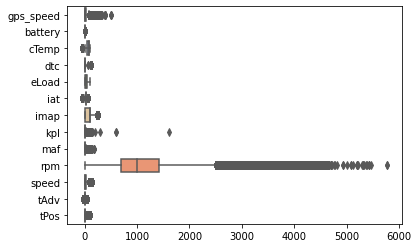

In [ ]:
ax = sns.boxplot(data=df_analysis, orient="h", palette="Set2")

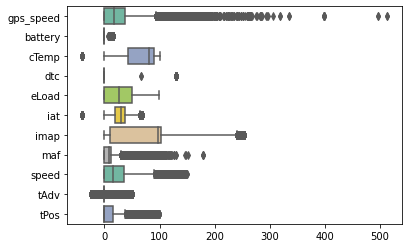

In [ ]:
# rpm and kpl greater range than other variables. Replot to inspect others better
ax = sns.boxplot(data=df_analysis.drop(columns=['rpm', 'kpl']), orient="h", palette="Set2")

Notable features:
* rpm large range with long tail. Not many points below 800
* gps_speed and speed although correlated do not have same spread. GPS_speed has large outliers so possible incorrect data

In [ ]:
# Data all converted to floats so describe gives us statistical analysis
df_analysis.describe()

,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
count,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06,3.120240e+06
mean,2.410440e+01,2.403974e+00,6.094606e+01,2.895611e-03,3.093106e+01,2.615207e+01,7.191372e+01,5.484311e+00,7.920082e+00,9.688559e+02,2.264481e+01,1.875541e+00,1.243773e+01
std,2.619350e+01,5.220560e+00,3.446449e+01,6.089851e-01,2.770033e+01,1.554953e+01,4.932823e+01,9.137718e+00,8.626813e+00,6.728343e+02,2.530813e+01,7.356457e+00,2.512771e+01
min,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.900000e+01,1.000000e+01,0.000000e+00,0.000000e+00,7.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.703840e+01,0.000000e+00,8.000000e+01,0.000000e+00,2.705880e+01,3.000000e+01,9.700000e+01,2.755800e+00,7.690000e+00,9.920000e+02,1.600000e+01,0.000000e+00,0.000000e+00
75%,3.759560e+01,0.000000e+00,8.900000e+01,0.000000e+00,4.980390e+01,3.700000e+01,1.020000e+02,7.696800e+00,1.214000e+01,1.421000e+03,3.600000e+01,0.000000e+00,1.529410e+01
max,5.122262e+02,1.544000e+01,1.000000e+02,1.290000e+02,9.960780e+01,6.900000e+01,2.540000e+02,1.611200e+03,1.780800e+02,5.764000e+03,1.490000e+02,5.050000e+01,9.960780e+01


In [ ]:
# Identify categorical columns with low number of unique values
df_analysis.nunique()

timeStamp    1740022
gps_speed      12090
battery          722
cTemp             96
dtc                3
eLoad            259
iat               66
imap             253
kpl           104880
maf             7041
rpm            12427
speed            150
tAdv             152
tPos             259
uid             1891
dtype: int64

dtc looks like a category

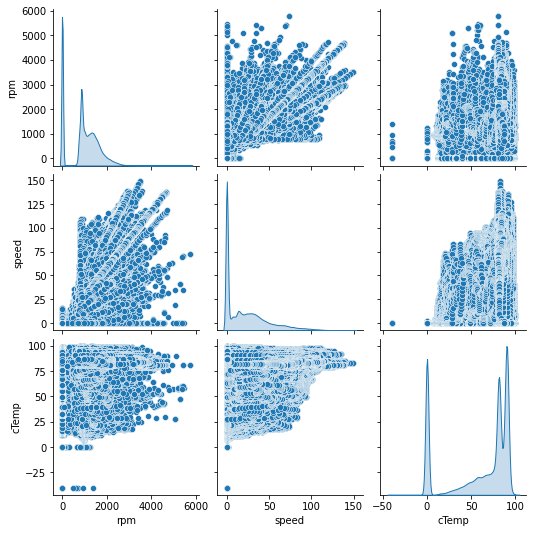

In [ ]:
# See pairwise plot of highly correlated features
sns.pairplot(df_analysis[['rpm', 'speed', 'cTemp']], diag_kind = "kde")

Notable features:
* most rpm values occur around 0. Data dictionary said that journeys were when an engine was switched on to off. Maybe engine auto on/off during operation
* cTemp ramps up to stable range but dip between approx. 75 and 80. Indicates two main operating modes
* speed and rpm looks to have distinct bands but distribution of rpm indicates rpm can occur at most speeds.

Have a look at some rpm plots

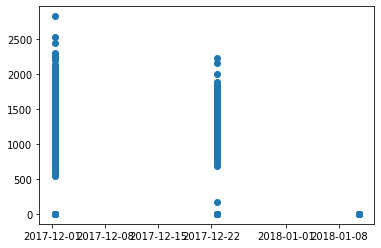

In [ ]:
import matplotlib.pyplot as plt

rpm_plots = df_cln[df_cln.tripID==1][['timeStamp', 'rpm']]

plt.scatter(rpm_plots.timeStamp, rpm_plots.rpm)

3 periods of activity. TripID is meant to be engine on to off. Long periods of inactivity contained within trip

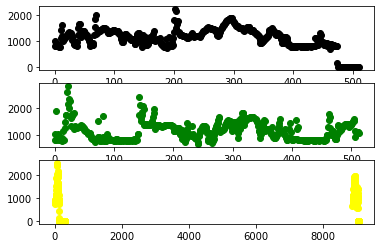

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
colours = ['black', 'green', 'yellow', 'blue', 'red']

def plotter(i):
  rpm_plots = df_cln[df_cln.tripID==i][['timeStamp', 'rpm']][0:512]
  rpm_plots['time_delta'] = rpm_plots.timeStamp.diff()
  rpm_plots['time_delta'] = rpm_plots['time_delta'].dt.seconds.cumsum()
  rpm_plots['time_delta'] = rpm_plots['time_delta'].fillna(0)
  return rpm_plots

plot_1 = plotter(1)
plot_2 = plotter(2)
plot_3 = plotter(3)

ax1.scatter(plot_1.time_delta, plot_1.rpm, color=str(colours[0]))
ax2.scatter(plot_2.time_delta, plot_2.rpm, color=str(colours[1]))
ax3.scatter(plot_3.time_delta, plot_3.rpm, color=str(colours[2]))
  
plt.show()


2 of the 3 rpm traces show continuous activity over first 8.5 mins. If using data then this will likely need to be checked that activity is continuous. Data collected at 1Hz so a simple sum check will suffice to ensure we get continuous data relating to the same activity.

Assumption is engine suffers more during warm up phase. Check to see how long engine temp takes to stabilise

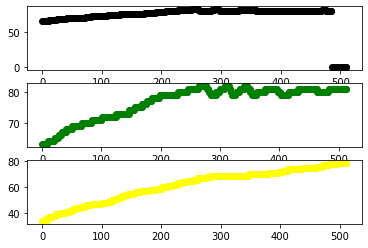

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
colours = ['black', 'green', 'yellow', 'blue', 'red']

def plotter(i):
  temp_plots = df_cln[df_cln.tripID==i][['timeStamp', 'cTemp']][0:512]
  temp_plots['time_delta'] = temp_plots.timeStamp.diff()
  temp_plots['time_delta'] = temp_plots['time_delta'].dt.seconds.cumsum()
  temp_plots['time_delta'] = temp_plots['time_delta'].fillna(0)
  return temp_plots

plot_1 = plotter(1)
plot_2 = plotter(2)
plot_3 = plotter(4)

ax1.scatter(plot_1.time_delta, plot_1.cTemp, color=str(colours[0]))
ax2.scatter(plot_2.time_delta, plot_2.cTemp, color=str(colours[1]))
ax3.scatter(plot_3.time_delta, plot_3.cTemp, color=str(colours[2]))
  
plt.show()


##Train a CNN autocoder to identify anomalous driving styles

Using rpm as a proxy for driving style. Use a CNN (1D) autoencoder to learn features in an unsupervised manner. Clustering will be done using the bottleneck layer from the autoencoder, visualised using UMAP and clustered using DBSCAN. 

###Feature engineering

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, AveragePooling1D

In [ ]:
df_cln.sort_values(['uid', 'timeStamp'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Need to scale rpm values. Use StandardScaleras as data has outliers that are much greater in value than majority.

In [ ]:
import numpy as np
# Group data into trips and take first 2 mins of driving to classify
# Create a new dataframe containing first two mins of a trip to pass through for normalising
trips = []
skipped_trips = []
for index, i in enumerate(list(set(df_cln.uid))):
  tmp = df_cln[df_cln.uid==i][0:128]
  tmp['time_delta'] = tmp.timeStamp.diff()
  tmp['time_delta'] = tmp['time_delta'].dt.seconds.cumsum()
  tmp['time_delta'] = tmp['time_delta'].fillna(0)
  if max(tmp.time_delta)>128:
    skipped_trips.append(i)
    if index==0:
      union = tmp
    continue
  else:
    trips.append(list(np.asarray(tmp.rpm).flatten()))
  if index==0:
    union = tmp
  else:
    union = pd.concat([tmp, union], ignore_index=True)

union.head()  

,tripID,deviceID,timeStamp,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,uid,time_delta
0,6,3.0,2018-01-10 20:34:10,0.0000,0.0,42.0,0.0,31.7647,31.0,98.0,0.0000,6.99,751.0,0.0,0.0,0.0,6-3.0,0.0
1,6,3.0,2018-01-10 20:34:11,0.0000,0.0,42.0,0.0,30.9804,31.0,98.0,0.0000,6.94,751.0,0.0,0.0,0.0,6-3.0,1.0
2,6,3.0,2018-01-10 20:34:12,0.0000,0.0,42.0,0.0,47.4510,31.0,98.0,0.0000,6.74,723.0,0.0,0.0,0.0,6-3.0,2.0
3,6,3.0,2018-01-10 20:34:13,0.0000,0.0,42.0,0.0,44.3137,31.0,98.0,0.4184,7.22,742.0,1.0,0.0,0.0,6-3.0,3.0
4,6,3.0,2018-01-10 20:34:14,3.3336,0.0,42.0,0.0,37.6471,31.0,98.0,0.4093,7.38,766.0,1.0,0.0,0.0,6-3.0,4.0


Of the 1891 trips:
* 34 had less than 2mins of continuous driving at the start
* 176 had less than 4.5mins of continuous driving at the start
* 494 had less than 8.5mins of continuous driving at the start


In [ ]:
union.sort_values(by=['uid', 'timeStamp'], inplace=True)

# Split data into training, test and validation sets via uid
trips = list(set(union.uid))

# Use row count to index values before split
union.reset_index(inplace=True)
no_trips = len(trips)
train =  trips[0:int(len(trips)*0.8)]
test = trips[int(len(trips)*0.8):]

# Create train/test split
x_train = union[union.uid.isin(train)]
x_test = union[union.uid.isin(test)]

x_test.reset_index(inplace=True)

Scale rpm data using Standard scaler. Could use MinMax but large outliers will influence the scaling. Also may run into issues with unbounded upper limit but this could be tested in future

In [ ]:
# Min max scale data
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

scaler = scaler.fit(x_train[['rpm']])
df_scaled = pd.DataFrame(scaler.transform(x_train[['rpm']]))

In [ ]:
# recombine scaled data with original data

df_transformed = df_scaled.join(x_train[['timeStamp', 'uid']])

# Sort data by tripID and then timestamp
df_transformed.sort_values(by=['uid', 'timeStamp'], inplace=True)
df_transformed.head()

,0,timeStamp,uid
0,0.239292,2017-12-22 18:43:05,1-0.0
1,0.239292,2017-12-22 18:43:05,1-0.0
2,-0.101941,2017-12-22 18:43:06,1-0.0
3,-0.101941,2017-12-22 18:43:06,1-0.0
4,-0.020237,2017-12-22 18:43:07,1-0.0


In [ ]:
# Group data into trips and take first 2.5 mins of driving to classify
trips = []
for i in list(set(df_transformed.uid)):
  tmp = list(np.asarray(df_transformed[df_transformed.uid==i][0]).flatten()[0:128])
  trips.append(tmp)  

In [ ]:
# Use pad sequences to transform data into correct shape
# If approach was to change and use entire rpm profile then this would
# allow the model to work but would require additional masking
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(trips, padding="post", dtype='float')

In [ ]:
# Need to repeat scaling process for test steps

def scale_data(data_frame, std_scaler):
  df_scaled = pd.DataFrame(std_scaler.transform(data_frame[['rpm']]))
  df_joined = df_scaled.join(data_frame[['timeStamp', 'uid']])
  trips = []
  for i in list(set(df_joined.uid)):
    tmp = list(np.asarray(df_joined[df_joined.uid==i][0]).flatten()[0:128])
    trips.append(tmp)
  scaled_inputs = tf.keras.preprocessing.sequence.pad_sequences(trips, padding="post", dtype='float')
  return scaled_inputs

test_inputs = scale_data(x_test, scaler)

###Model training

In [ ]:
# Model structure

# Going to use a 1D CNN layers modelled as an autoencoder. 
# Layers built as 128-64-1 filters with 3 as kernel size (1D window size)
# Max pooling gives bottleneck layer of 32 dims

input_window = Input(shape=(train_inputs.shape[1],1))
x = Conv1D(128, 3, activation="relu", padding="same")(input_window)
x = MaxPooling1D(2, padding="same")(x)
x = Conv1D(64, 3, activation="relu", padding="same")(x)
x = MaxPooling1D(2, padding="same")(x)

encoded = Conv1D(1, 3, activation="relu", padding="same")(x)

x = UpSampling1D(2)(encoded)
x = Conv1D(64, 1, activation='relu')(x)
x = UpSampling1D(2)(x)
x = Conv1D(128, 3, activation="relu", padding="same")(x) 

decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x)
autoencoder = Model(input_window, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 1)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 128, 128)          512       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 64, 128)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 64, 64)            24640     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 32, 64)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 32, 1)             193 

In [ ]:
history = autoencoder.fit(
    train_inputs, 
    train_inputs,
    epochs=20,
    batch_size=128,
    validation_data=(test_inputs, test_inputs),
    verbose=1).history

Epoch 1/20
9/9 [==============================] - 3s 189ms/step - loss: 1.1684 - val_loss: 0.9002
Epoch 2/20
9/9 [==============================] - 0s 11ms/step - loss: 0.8555 - val_loss: 0.7385
Epoch 3/20
9/9 [==============================] - 0s 11ms/step - loss: 0.7907 - val_loss: 0.7207
Epoch 4/20
9/9 [==============================] - 0s 11ms/step - loss: 0.7754 - val_loss: 0.7071
Epoch 5/20
9/9 [==============================] - 0s 11ms/step - loss: 0.7629 - val_loss: 0.6996
Epoch 6/20
9/9 [==============================] - 0s 13ms/step - loss: 0.7561 - val_loss: 0.6941
Epoch 7/20
9/9 [==============================] - 0s 12ms/step - loss: 0.7500 - val_loss: 0.6880
Epoch 8/20
9/9 [==============================] - 0s 11ms/step - loss: 0.7429 - val_loss: 0.6808
Epoch 9/20
9/9 [==============================] - 0s 12ms/step - loss: 0.7346 - val_loss: 0.6726
Epoch 10/20
9/9 [==============================] - 0s 12ms/step - loss: 0.7254 - val_loss: 0.6640
Epoch 11/20
9/9 [===========

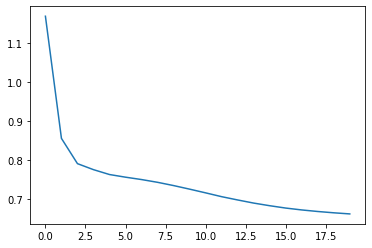

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])

In [ ]:
pred = np.reshape(train_inputs[1], (1,128))
# If we want to see output of model final layer
decoded = autoencoder.predict(pred)

1/1 [==============================] - 0s 118ms/step


In [ ]:
# See layers of model
autoencoder.layers

In [ ]:
# connect the bottleneck as the output layer
model = Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[5].output)


##Dimensionality reduction and clustering

In [ ]:
import umap
import bokeh
import umap.plot

In [ ]:
# get the bottleneck vector for the data
yhat = model.predict(train_inputs)

34/34 [==============================] - 0s 6ms/step


In [ ]:
# Reshape array for umap
umap_array = np.reshape(yhat, (yhat.shape[0], yhat.shape[1]))

In [ ]:
# Reduce 32 dim vector down to 2D for visualisation
# Reason we use bottleneck layer as we want to identify the high level features
mapper = umap.umap_.UMAP().fit(umap_array)

In [ ]:
from sklearn.cluster import DBSCAN

db_cluster = DBSCAN(eps=0.4, min_samples=10, algorithm='ball_tree', metric='euclidean', leaf_size=30, p=2)
arr = db_cluster.fit_predict(mapper.embedding_)
print("Clusters assigned are:", set(db_cluster.labels_))

Clusters assigned are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}


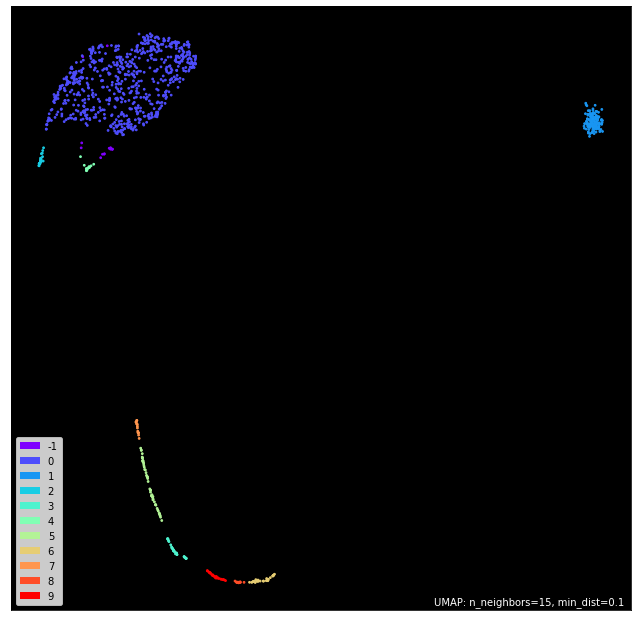

In [ ]:
umap.plot.points(mapper, labels=db_cluster.labels_, theme='fire')

In [ ]:
# Identify anomalous trips
anomalous = [uid for index, uid in enumerate(list(set(df_transformed.uid))) if index in np.where(db_cluster.labels_ < 0)[0]]

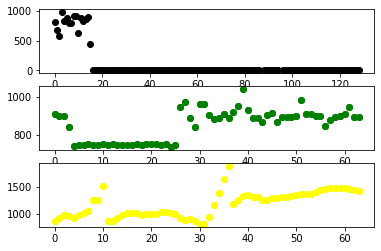

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
colours = ['black', 'green', 'yellow', 'blue', 'red']

def plotter(i):
  rpm_plots = union[union.uid==i][['timeStamp', 'rpm']][0:512]
  rpm_plots['time_delta'] = rpm_plots.timeStamp.diff()
  rpm_plots['time_delta'] = rpm_plots['time_delta'].dt.seconds.cumsum()
  rpm_plots['time_delta'] = rpm_plots['time_delta'].fillna(0)
  return rpm_plots

plot_1 = plotter(anomalous[0])
plot_2 = plotter(anomalous[1])
plot_3 = plotter(anomalous[2])

ax1.scatter(plot_1.time_delta, plot_1.rpm, color=str(colours[0]))
ax2.scatter(plot_2.time_delta, plot_2.rpm, color=str(colours[1]))
ax3.scatter(plot_3.time_delta, plot_3.rpm, color=str(colours[2]))
  
plt.show()

In [ ]:
# Find largest cluster
np.unique(db_cluster.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([ 14, 706, 143,  24,  34,  13,  52,  30,  16,  12,  27]))

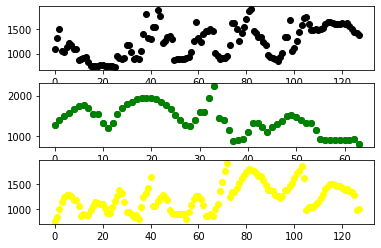

In [ ]:
# See similar trips
cluster_1 = [uid for index, uid in enumerate(list(set(df_transformed.uid))) if index in np.where(db_cluster.labels_ == 0)[0]]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
colours = ['black', 'green', 'yellow']

plot_1 = plotter(cluster_1[1])
plot_2 = plotter(cluster_1[2])
plot_3 = plotter(cluster_1[3])

ax1.scatter(plot_1.time_delta, plot_1.rpm, color=str(colours[0]))
ax2.scatter(plot_2.time_delta, plot_2.rpm, color=str(colours[1]))
ax3.scatter(plot_3.time_delta, plot_3.rpm, color=str(colours[2]))
  
plt.show()